## Análisis de Componentes Principales
El análisis de componentes principales (PCA) es el proceso mediante el cual se calculan los componentes principales de una matriz de datos con el objeto de realizar una comprensión de los datos. PCA es un enfoque no supervisado, lo que significa que se realiza en un conjunto de variables $X_1, X_2,…, X_d$ sin respuesta asociada $Y$. PCA reduce la dimensionalidad del conjunto de datos, lo que permite explicar la mayor parte de la variabilidad utilizando menos variables. El PCA se usa comúnmente como una primera herramienta de visualización de los datos, para reducir el número de variables y evitar la multicolinealidad, o cuando se tienen demasiados predictores en relación con el número de observaciones.

Sea $X$ una matriz de $n$ datos $d$-dimensionales, con cada componente  de media nula, i.e.

$$X = \begin{pmatrix}
x_{11} &...& x_{1d} \\
&...&\\
x_{n1}&...& x_{nd} \\
\end{pmatrix}
\quad donde \quad \bar{\bf{x}_j}=0, \quad j=1,...,d$$

Buscamos la dirección $w'=(w_1,...,w_d)$ tal que la proyección de $X$ sobre esta dirección maximice la varianza empírica de $Xw$: 

$$\max_w \hat{\sigma}^2(Xw) \quad \text{s. a} \quad \|w\|=1$$

Tenemos que:

$$\hat{\sigma}^2(Xw) =  w'X'Xw  - (\mathbb{E}(Xw))^2= w' \hat{\Sigma} w$$

donde  $\hat{\Sigma}$ es la varianza empírica de $X$:
$$\hat{\Sigma} = X'X = \begin{pmatrix}
\sum_{i=1}^n (x_{i1})^2 &...& \sum_{i=1}^n (x_{i1}x_{id}) \\
&...&\\
\sum_{i=1}^n (x_{id}x_{i1})&...& \sum_{i=1}^n (x_{id})^2  \\
\end{pmatrix}$$

Para maximizar la varianza $\hat{\sigma}^2(Xw)$, construimos el Lagrangiano:

$$L = w' \hat{\Sigma} w + \lambda (w'w-1)$$

La condición de máximo queda:

$$\frac{\partial L}{\partial w} = 2 \hat{\Sigma} w - 2\lambda w = 0 \quad \implies \quad \hat{\Sigma} w = \lambda w$$

Con lo cual $w$ es un vector propio de $\hat{\Sigma}$,  y por lo tanto

$$\hat{\sigma}^2(Xw) = w' \hat{\Sigma} w = w' (\lambda w) = \lambda$$

la dirección de máxima varianza es la dirección asociada al vector propio cuyo valor propio es máximo.
Este procedimiento puede iterarse para obtener la segunda proyección (ortogonal a la primera) de máxima varianza, que será el vector propio correspondiente al segundo mayor valor propio. Y por inducción se pueden obtener las siguientes componentes principales.

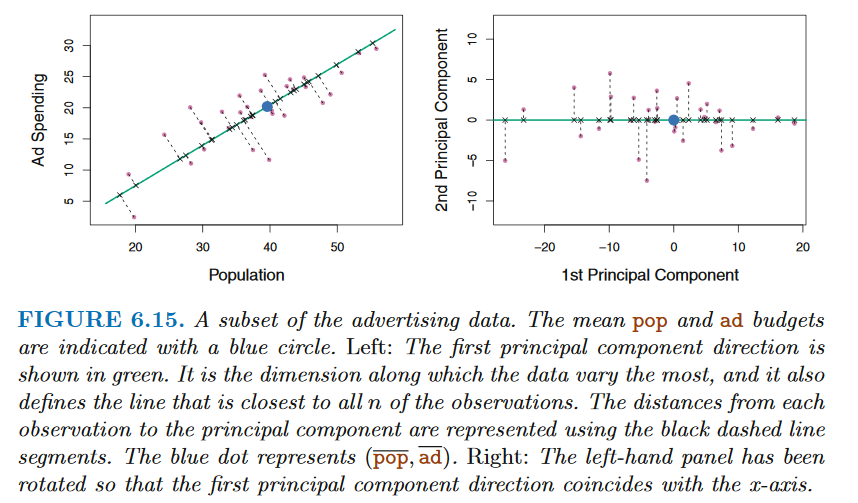

In [1]:
library("IRdisplay")
display_png(file="ejemploPCA.png",width=600)

**Referencias**:
1. Kevin Murphy (2012) "Machine Learning, a probabilistic approach", Capítulo 12. MIT Press
2. Hastie, Tibshirani and Friedman, "The elements of statistical learning" 2nd Ed., Springer, Capítulo 14
3. Ethem Alpayin (2004) "Introduction to Machine Learning", Capítulo 6, MIT Press


###### Ejercicio 1: 
Derive expresiones para demostrar que la segunda dirección (ortogonal a la primera) de máxima varianza, es el vector propio correspondiente al segundo mayor valor propio.

#### Ejemplo Ilustrativo:
Consideremos el conjunto de datos de "USArrests" que está integrado en R. Este es un conjunto de datos que contiene cuatro variables que representan el número de arrestos por cada 100.000 residentes por asalto, asesinato y violación en cada uno de los cincuenta estados de EE. UU. en el año 1973. Los datos  contienen también  el porcentaje de la población que vive en áreas urbanas, UrbanPop. 

In [2]:
data("USArrests")
head(USArrests, 10)


,Murder,Assault,UrbanPop,Rape
,<dbl>,<int>,<int>,<dbl>
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9


#### Preparando los datos
Para desarrollar los algoritmos vistos es preferible que cada variable  se centre en cero y que tengan una escala común. Por ejemplo, la varianza de Asalto es 6945, mientras que la varianza de Asesinato es solo 18.97. Los datos de Asalto no son necesariamente más variables, simplemente están en una escala diferente en relación con el Asesinato.

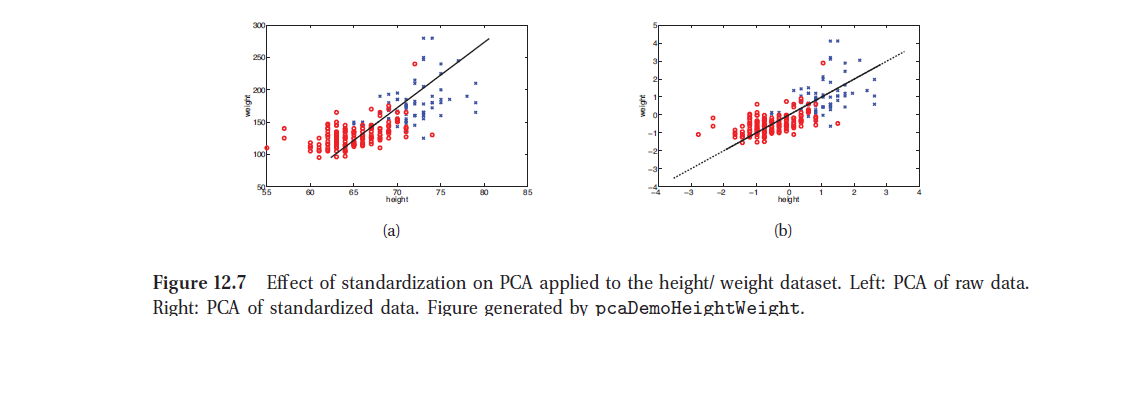

In [3]:
display_png(file="figura2.png")

In [6]:
getRversion()

[1] ‘4.1.3’

Installing package into ‘/opt/homebrew/lib/R/4.1/site-library’
(as ‘lib’ is unspecified)



corrplot 0.92 loaded



     Murder          Assault         UrbanPop          Rape      
 Min.   : 0.800   Min.   : 45.0   Min.   :32.00   Min.   : 7.30  
 1st Qu.: 4.075   1st Qu.:109.0   1st Qu.:54.50   1st Qu.:15.07  
 Median : 7.250   Median :159.0   Median :66.00   Median :20.10  
 Mean   : 7.788   Mean   :170.8   Mean   :65.54   Mean   :21.23  
 3rd Qu.:11.250   3rd Qu.:249.0   3rd Qu.:77.75   3rd Qu.:26.18  
 Max.   :17.400   Max.   :337.0   Max.   :91.00   Max.   :46.00  

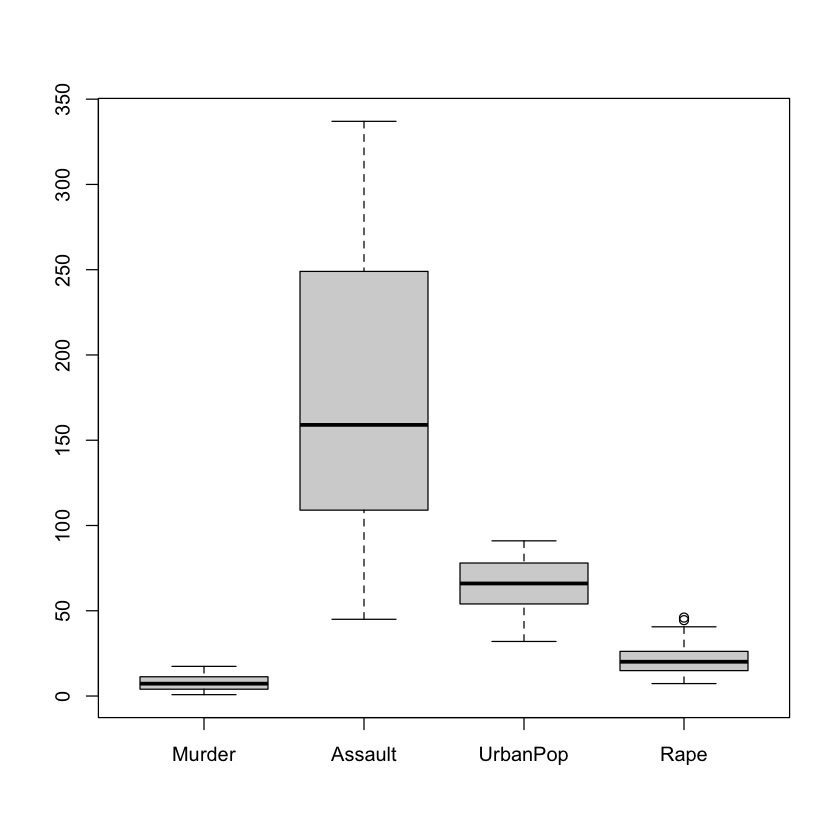

             Murder   Assault   UrbanPop      Rape
Murder   1.00000000 0.8018733 0.06957262 0.5635788
Assault  0.80187331 1.0000000 0.25887170 0.6652412
UrbanPop 0.06957262 0.2588717 1.00000000 0.4113412
Rape     0.56357883 0.6652412 0.41134124 1.0000000


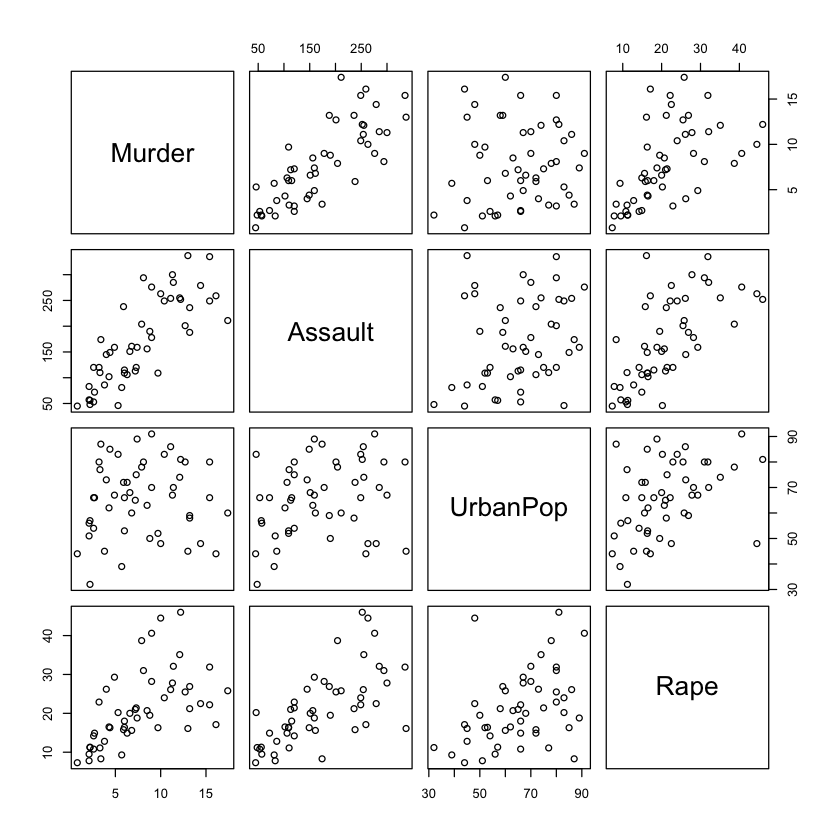

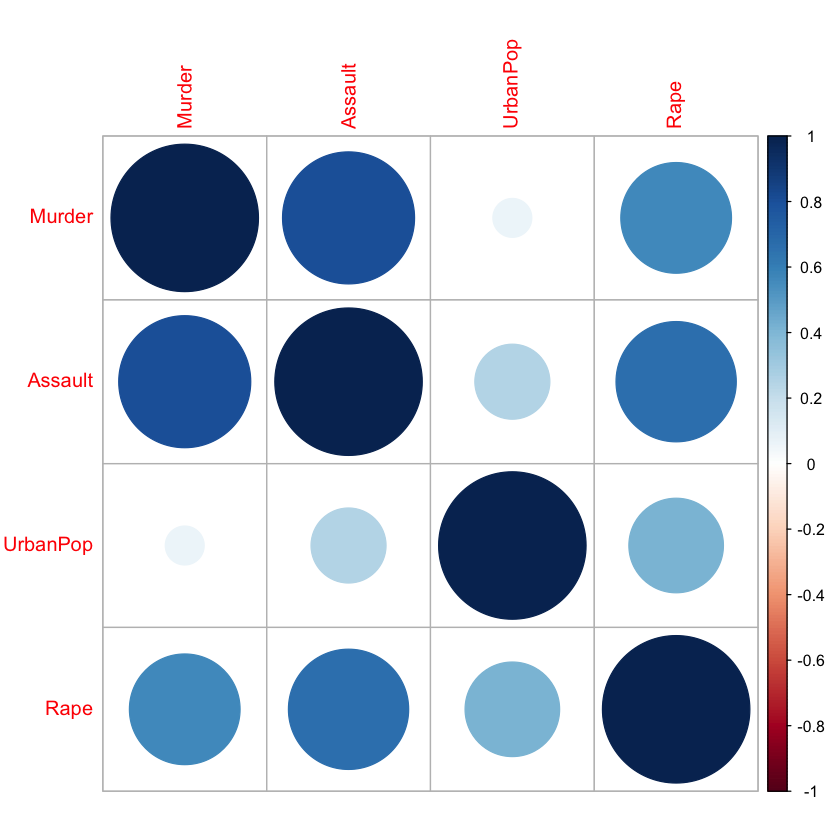

In [7]:
#análisis exploratorio de los datos

library(corrplot)

# cada variable
summary(USArrests)
boxplot(USArrests)

#relaciones entre variables
plot(USArrests)
mcor<-cor(USArrests)
print(mcor)

corrplot(mcor)



In [8]:
# calcula varianzas para cada variable
apply(USArrests, 2, var)
apply(USArrests,2,mean)


Murder    Assault   UrbanPop       Rape 
  18.97047 6945.16571  209.51878   87.72916

Murder  Assault UrbanPop     Rape 
   7.788  170.760   65.540   21.232

Una posibilidad es estandarizar las variables:

In [9]:
# escalando los datos
scaled_df <- apply(USArrests, 2, scale)
head(scaled_df)
apply(scaled_df, 2, var)
apply(scaled_df, 2, mean)

Murder,Assault,UrbanPop,Rape
1.24256408,0.7828393,-0.5209066,-0.003416473
0.50786248,1.1068225,-1.2117642,2.484202941
0.07163341,1.4788032,0.9989801,1.042878388
0.23234938,0.2308680,-1.0735927,-0.184916602
0.27826823,1.2628144,1.7589234,2.067820292
0.02571456,0.3988593,0.8608085,1.864967207


Murder  Assault UrbanPop     Rape 
       1        1        1        1

Murder       Assault      UrbanPop          Rape 
 1.543210e-16  1.143530e-16 -3.996803e-16  8.526513e-16

Sin embargo, no siempre el escalado es  deseable. Un ejemplo sería si cada variable en el conjunto de datos tuviera las mismas unidades y el analista deseara capturar esta diferencia en la varianza para sus resultados. Dado que Asesinato, Asalto y Violación se miden según las ocurrencias por cada 100,000 personas, esto puede ser razonable dependiendo de cómo quiera interpretar los resultados. Pero como UrbanPop se mide como un porcentaje de la población total, no tendría sentido comparar la variabilidad de UrbanPop con el asesinato, el asalto y la violación.

Lo importante a recordar es que el PCA está influenciado por la magnitud de cada variable; por lo tanto, los resultados obtenidos cuando realizamos PCA también dependerán de si las variables se han escalado individualmente.

In [10]:
# Calculando valores y vectores propios de la matriz de covarianzas empírica
arrests.cov <- cov(scaled_df)
arrests.eigen <- eigen(arrests.cov)
arrests.eigen


eigen() decomposition
$values
[1] 2.4802416 0.9897652 0.3565632 0.1734301

$vectors
          [,1]       [,2]       [,3]        [,4]
[1,] 0.5358995  0.4181809 -0.3412327  0.64922780
[2,] 0.5831836  0.1879856 -0.2681484 -0.74340748
[3,] 0.2781909 -0.8728062 -0.3780158  0.13387773
[4,] 0.5434321 -0.1673186  0.8177779  0.08902432


In [11]:
# Extrayendo los pesos de los dos primeras componentes principales 
w <- -arrests.eigen$vectors[,1:2] 
row.names(w) <- c("Murder", "Assault", "UrbanPop", "Rape")
colnames(w) <- c("PC1", "PC2")
w


,PC1,PC2
Murder,-0.5358995,-0.4181809
Assault,-0.5831836,-0.1879856
UrbanPop,-0.2781909,0.8728062
Rape,-0.5434321,0.1673186


In [12]:
# Calcula proyección de los datos en cada componente principal 
PC1 <- as.matrix(scaled_df) %*% w[,1]
PC2 <- as.matrix(scaled_df) %*% w[,2]

# Crea nuevo dataframe con la proyección
PC <- data.frame(State = row.names(USArrests), PC1, PC2)
head(PC)

,State,PC1,PC2
,<chr>,<dbl>,<dbl>
1,Alabama,-0.9756604,-1.1220012
2,Alaska,-1.9305379,-1.0624269
3,Arizona,-1.7454429,0.7384595
4,Arkansas,0.1399989,-1.1085423
5,California,-2.4986128,1.5274267
6,Colorado,-1.4993407,0.9776297


In [14]:
install.packages("ggplot2")
library(ggplot2)
# Grafico en primer plano principal
ggplot(PC, aes(PC1, PC2)) + 
  modelr::geom_ref_line(h = 0) +
  modelr::geom_ref_line(v = 0) +
  geom_text(aes(label = State), size = 3) +
  xlab("Primera Componente Principal") + 
  ylab("Segunda Componente Principal") + 
  ggtitle("Proyección en primer plano principal del los datos USArrests")

Installing package into ‘/opt/homebrew/lib/R/4.1/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘colorspace’, ‘farver’, ‘labeling’, ‘munsell’, ‘R6’, ‘RColorBrewer’, ‘viridisLite’, ‘magrittr’, ‘pkgconfig’, ‘gtable’, ‘isoband’, ‘scales’, ‘tibble’, ‘withr’




ERROR: Error in loadNamespace(x): there is no package called ‘modelr’


#### Selección del número de componentes principales

Como ya se ha mencionado el PCA reduce la dimensionalidad al mismo tiempo que explica la mayor parte de la variabilidad, pero existe un método más técnico para medir exactamente qué porcentaje de la varianza se mantuvo en estos componentes principales.

La proporción de varianza explicada (PVE) por la m-ésima componente principal se calcula utilizando la ecuación:
$$PVE = \frac{\sum_{i=1}^n \sum_{j=1}^d (w_{jm}x_{ij})^2}{\sum_{i=1}^n \sum_{j=1}^d {x_{ij}}^2}$$

De los cálculos previos se tiene que otra manera de calcular el PVE de la m-ésima componente principal es considerando los valores propios:
$$PVE = \frac{\lambda_m}{\sum_{j=1}^d \lambda_j}$$

In [17]:
PVE <- arrests.eigen$values / sum(arrests.eigen$values)
round(PVE, 2)

[1] 0.62 0.25 0.09 0.04

La primera componente principal en el ejemplo explica el 62% de la variabilidad, y la segunda componente principal explica el 25%. Juntas, las dos primeras componentes principales explican el 87% de la variabilidad. 

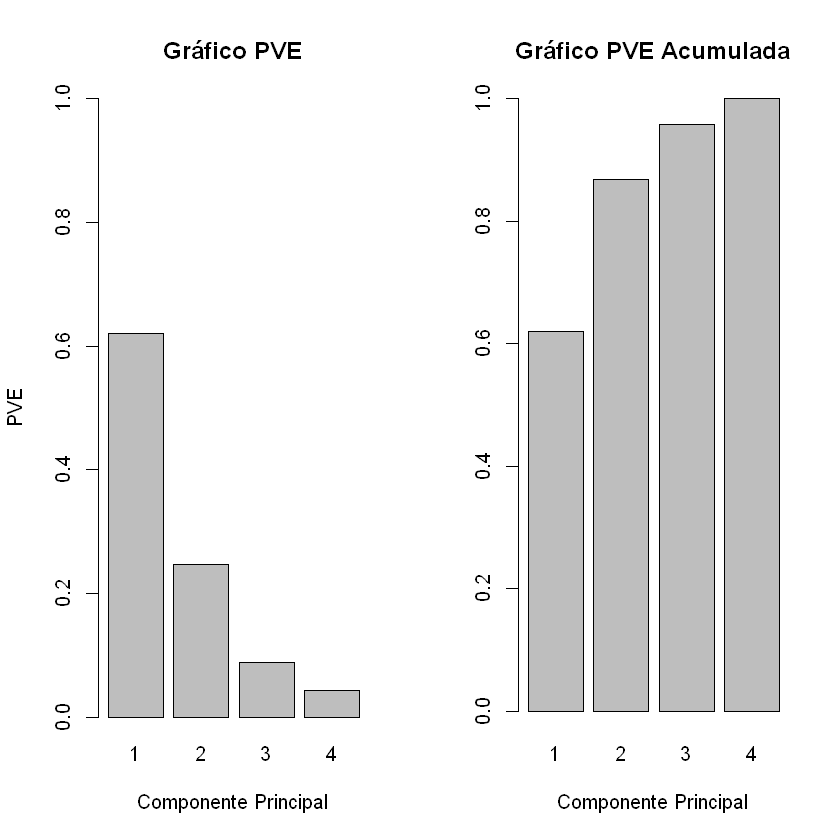

In [18]:

# Gráfico de la PVE
par(mfrow=c(1,2))
PVEplot <- barplot(PVE,xlab="Componente Principal", ylab="PVE", main= "Gráfico PVE", ylim=c(0, 1), names.arg=c(1:4))
cumPVE <- barplot(cumsum(PVE),xlab="Componente Principal", ylab="", main= "Gráfico PVE Acumulada", names.arg=c(1:4))


## Ahora con las funciones predefinidas en R

In [5]:
pca_res <- prcomp(USArrests, scale = TRUE)
names(pca_res)
pca_res$sdev #desviacion estandar
pca_res$rotation <- -pca_res$rotation 
pca_res$center #medias
pca_res$scale #varianza
pca_res$x <- -pca_res$x

[1] "sdev"     "rotation" "center"   "scale"    "x"

[1] 1.5748783 0.9948694 0.5971291 0.4164494

Murder  Assault UrbanPop     Rape 
   7.788  170.760   65.540   21.232

Murder   Assault  UrbanPop      Rape 
 4.355510 83.337661 14.474763  9.366385

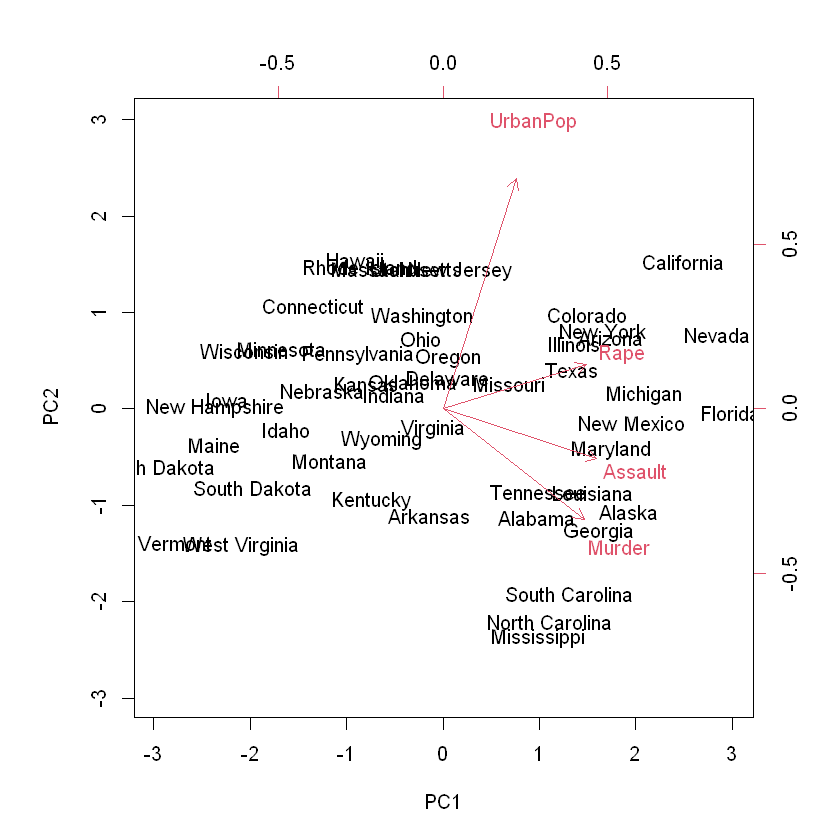

In [6]:
biplot(pca_res, scale = 0)

In [ ]:
# usar princomp

#### Ejercicio 2:
1. Explique como se relacionan variables y observaciones en este último gráfico. Compare los resultados obtenidos utilizando la función predefinida en R prcomp con aquellos de los cálculos previos. 

    En el grafico anterior se observa la correlación entre las variables: violacion y asalto, asalto y asesinato, poblacion urbana y violacion. Por ejemplo, se puede observar que en el estado de florida la probabilidad de sufrir un asalto y violacion es mayor que el de sufrir un asalto y que me asesinen. Tambien se puede ver que asalto y violacion estan mas influenciados por PC1, la diferencia es que violacion tiene tendencia a estar en valores positivos de PC1 y asalto esta en valores negativos de PC1
    Los datos calculados por prcomp presentan una varianza mucho menor a diferencia de los valores obtenidos con los calculos previos. Tambien se puede observar que las medias obtenidas son de identico valor. 

2. Explique a que corresponden cada una de las componente del objeto resultante de utilizar la función prcomp. 

    El primer conjunto de datos que se ve, corresponde a la desviacion estandar, cuyos valores son: 1.57487827439123;0.994869414817764;0.597129115502527 y 0.41644938195396
    El segundo conjunto de datos que se ve, corresponde a las medias de las variables, cuyos valores son:  7.788 para Murder, 170.76 para Assault, 65.54 para UrbanPop y 21.232 para Rape
    El ultimo conjunto de datos que se ve, corresponde a las varianzas de las variables, cuyos valores son: 4.35550976420929 para Murder, 83.3376608400171 para Assault, 14.4747634008368 para UrbanPop y 9.36638453105965 para Rape
    
    
3. Utilice la función predefinida en R princomp y compare con prcomp.


[1] 323  14

,Regi.n,Comuna,Poblaci.n..miles..2011,IDSE,Ingreso.per.c.p..Mens..miles....2006.11,Pobreza...2006.11,Escolaridad..aØos..2006.11,Material.Vivienda.bueno.o.acceptable...2006,Alcantarillado.o.Fosa.S.pt....2006,Esperanza.vida.al.nacer..aØos..2005.10,X.ndice.Desarrollo.Humano,Tasa.AVPP.x.1000.h.2007.11,X..defunc..50..aØos.2011,Mortalidad.Infantil.x.1000.NV.2009.11
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,Iquique,186.0,0.698,227.6,10.2,11.1,81.8,98.8,77.2,0.631,82.1,73.0,8.9
2,1,Pica,18.6,0.604,188.1,12.2,9.6,71.0,94.0,77.5,0.572,23.0,45.8,9.8
3,1,Pozo Almonte,17.3,0.591,176.0,9.8,9.7,73.1,83.5,77.3,0.574,44.3,66.7,7.1
4,1,Alto Hospicio,93.8,0.577,166.3,20.9,10.1,65.9,98.4,78.1,0.555,46.7,56.2,4.9
5,1,Huara,3.4,0.382,161.4,10.0,7.6,49.0,38.9,81.8,0.592,55.8,44.4,8.9
6,2,Calama,148.8,0.717,269.3,8.5,10.9,85.0,98.9,76.2,0.625,87.2,63.4,9.7


       V1               V2               V3               V4       
 Min.   :  2.10   Min.   :0.2350   Min.   :  89.2   Min.   : 1.30  
 1st Qu.: 10.25   1st Qu.:0.4655   1st Qu.: 127.9   1st Qu.:10.80  
 Median : 19.20   Median :0.5440   Median : 155.1   Median :15.10  
 Mean   : 52.30   Mean   :0.5444   Mean   : 176.9   Mean   :16.34  
 3rd Qu.: 55.55   3rd Qu.:0.6200   3rd Qu.: 191.5   3rd Qu.:21.00  
 Max.   :735.40   Max.   :0.9920   Max.   :1143.1   Max.   :39.50  
       V5               V6              V7               V8       
 Min.   : 6.400   Min.   :49.00   Min.   : 23.60   Min.   :68.10  
 1st Qu.: 8.100   1st Qu.:73.90   1st Qu.: 69.60   1st Qu.:75.10  
 Median : 9.000   Median :80.80   Median : 82.90   Median :76.40  
 Mean   : 9.093   Mean   :79.55   Mean   : 80.03   Mean   :76.22  
 3rd Qu.: 9.900   3rd Qu.:86.05   3rd Qu.: 93.65   3rd Qu.:77.50  
 Max.   :15.000   Max.   :98.00   Max.   :100.00   Max.   :82.20  
       V9              V10              V11            

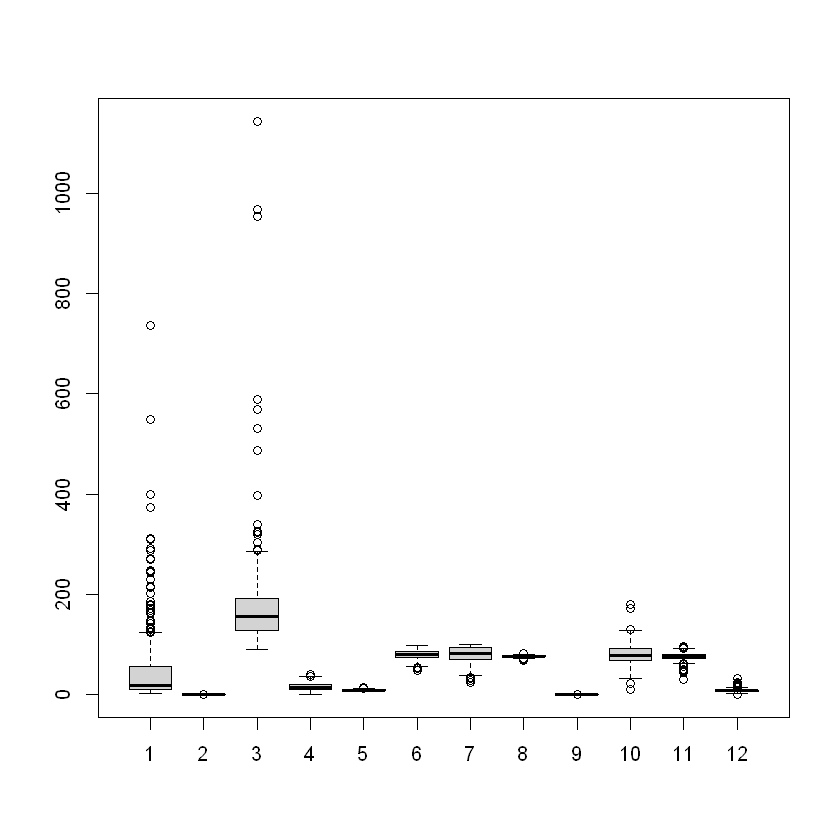

In [1]:
datos <- read.table("comunas.csv",sep=";",dec=".",header= TRUE)
dim(datos)
head(datos)
datos1 <- as.matrix(datos[1:323,3:14])
datos2 <- matrix(as.numeric(datos1),ncol=12,nrow=323,byrow=FALSE)
summary(datos2)
boxplot(datos2)

#### Ejercicio 3: 
Considere los datos socio-económicos y de salud disponibles en el archivo "comunas.csv". Filtre los datos para analizar un grupo específico de comunas (al menos 30): por ejemplo sólo de 3 regiones, en un rango de número de habitantes, etc. 
1. Realice un Análisis de Componentes Principales para estos datos. 
2. Analice e interprete sus resultados

In [38]:
library(dplyr)
datos <- read.table("comunas.csv",sep=";",dec=".",header= TRUE)
datos3 = filter(datos, IDSE < 0.4)
dim(datos3)
head(datos3)

[1] 32 14

,Regi.n,Comuna,Poblaci.n..miles..2011,IDSE,Ingreso.per.c.p..Mens..miles....2006.11,Pobreza...2006.11,Escolaridad..aØos..2006.11,Material.Vivienda.bueno.o.acceptable...2006,Alcantarillado.o.Fosa.S.pt....2006,Esperanza.vida.al.nacer..aØos..2005.10,X.ndice.Desarrollo.Humano,Tasa.AVPP.x.1000.h.2007.11,X..defunc..50..aØos.2011,Mortalidad.Infantil.x.1000.NV.2009.11
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,Huara,3.4,0.382,161.4,10.0,7.6,49.0,38.9,81.8,0.592,55.8,44.4,8.9
2,4,Canela,8.5,0.397,118.3,16.9,7.1,64.4,63.0,77.7,0.447,88.7,83.6,6.4
3,4,Punitaqui,10.4,0.369,131.9,20.8,7.7,59.3,49.7,72.7,0.358,64.8,84.0,8.8
4,4,Combarbal˜,12.2,0.366,120.6,20.5,7.5,52.4,58.2,76.8,0.429,83.6,78.1,16.1
5,6,Paredones,6.8,0.385,120.4,14.1,6.9,73.9,47.6,76.2,0.422,72.3,84.8,10.9
6,7,Curepto,9.5,0.368,125.1,19.0,7.6,62.1,47.8,77.0,0.441,74.7,83.6,0.0


In [45]:
pca_res <- prcomp(datos3[-(1:10)], scale = TRUE)
names(pca_res)
pca_res$sdev #desviacion estandar
pca_res$rotation <- -pca_res$rotation 
pca_res$center #medias
pca_res$scale #varianza
pca_res$x <- -pca_res$x

[1] "sdev"     "rotation" "center"   "scale"    "x"

[1] 1.3579706 1.1499698 0.7130657 0.5701075

X.ndice.Desarrollo.Humano            Tasa.AVPP.x.1000.h.2007.11 
                            0.3560313                            96.9062500 
             X..defunc..50..aØos.2011 Mortalidad.Infantil.x.1000.NV.2009.11 
                           74.9718750                            10.2750000

X.ndice.Desarrollo.Humano            Tasa.AVPP.x.1000.h.2007.11 
                           0.06599437                           23.39162984 
             X..defunc..50..aØos.2011 Mortalidad.Infantil.x.1000.NV.2009.11 
                           8.55156029                            5.26675514

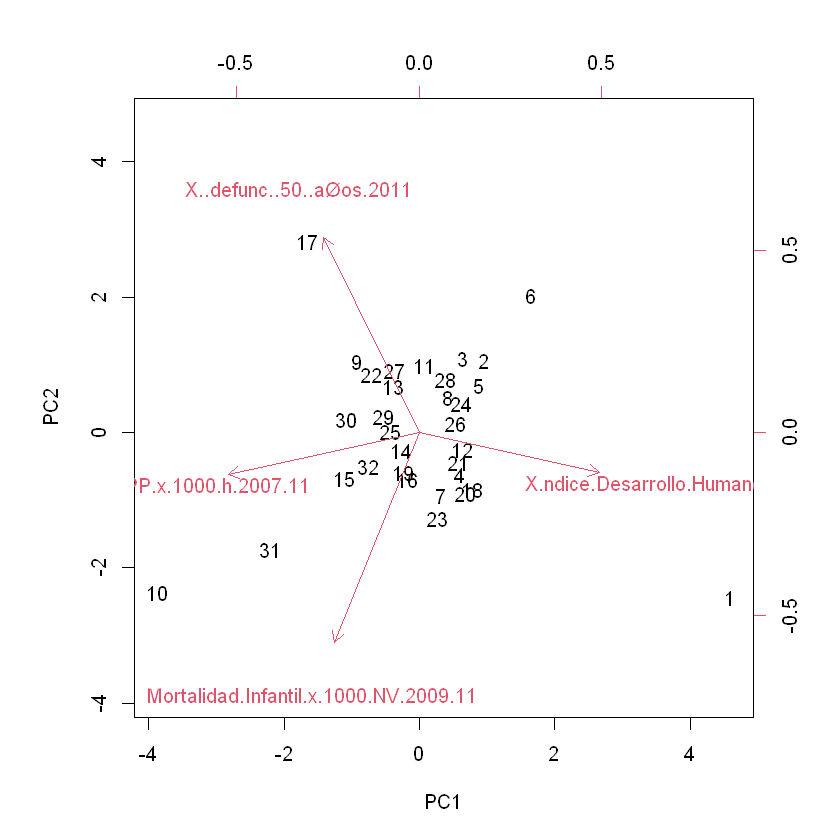

In [46]:
biplot(pca_res, scale = 0)

    A partir del grafico anterior se puede ver que el indice de desarrollo humano esta fuertemente influenciado por los valores positivos de PC1, mientras que las demás variables se ven influenciadas por los valores negativos de PC1. En cuanto a valores se puede ver que la comuna 17 es la  